# Airline Passenger Satisfatcion Classification

### This model tries to understand the services of an aviation company through a satisfaction passenger research 

# Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np

# Pandas Set Options

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Upload Datasets

In [ ]:
df_test = pd.read_csv(os.path.join(Path(os.getcwd()).parents[0], 'data', 'test.csv'))
df_train = pd.read_csv(os.path.join(Path(os.getcwd()).parents[0], 'data', 'train.csv'))

In [ ]:
fig, ax = plt.subplots()

test = ax.bar('test_rows', df_test.shape[0], label='Test')
test_col = ax.bar('test_col', df_test.shape[1], label='Test_col')

train = ax.bar('train_rows', df_train.shape[0], label='Train')
train_col = ax.bar('train_col', df_train.shape[1], label='Train_col')

ax.bar_label(test, label_type='edge')
ax.bar_label(train, label_type='edge')

ax.bar_label(test_col, label_type='edge')
ax.bar_label(train_col, label_type='edge')
plt.ylim(0, 150000)
plt.legend()

plt.show()

## 1.1 Concatenating the Datasets

In [ ]:
df_concat = pd.concat([df_train, df_test]).reset_index()

In [ ]:
df_concat.shape

## 1.2 Renaming columns

In [ ]:
df_rename = df_concat.copy()

In [ ]:
df_concat.info()

In [ ]:
df_rename.columns

In [ ]:
new_columns = [
    new_name.replace(' ', '_').lower()
    for new_name in df_rename.columns
    ]

In [ ]:
df_rename.columns = new_columns

### 1.2.1 Initial data cleaning

In [ ]:
len(df_rename['id'].unique())

In [ ]:
drop_cols = ['index', 'unnamed:_0', 'id']
df_rename.drop(drop_cols, axis = 1, inplace = True)

#### A: There's no duplicate ids. So, there's no reason to maintain this attribute

# 2. Data exploratory analysis

In [50]:
df_exploratory = df_rename.copy()

#### Q.1: Is any null value?

In [81]:
df_exploratory.columns[df_exploratory.isnull().any()]

Index(['arrival_delay_in_minutes'], dtype='object')

In [82]:
df_exploratory.isnull().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

#### A.1: Only one attribute have 393 null objects. That represents 0.3% of the data.

In [ ]:
# Descriptive Data Analysis
df_exploratory.info()

In [ ]:
# Count of dtypes
df_exploratory.dtypes.value_counts()

In [101]:
# A small sample
df_exploratory.sample(n = 5, random_state = 42)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
103044,Male,Loyal Customer,66,Personal Travel,Eco,1678,3,2,3,2,4,3,4,4,4,3,2,3,2,4,0,0.0,neutral or dissatisfied
43282,Female,Loyal Customer,38,Business travel,Business,954,2,2,2,2,2,3,1,4,4,4,4,2,4,4,3,0.0,satisfied
65543,Female,Loyal Customer,38,Business travel,Eco,189,2,1,1,1,2,2,2,2,1,2,4,1,4,2,0,0.0,neutral or dissatisfied
65083,Female,Loyal Customer,32,Personal Travel,Eco,175,2,5,2,1,1,2,1,1,3,5,4,5,4,1,0,0.0,neutral or dissatisfied
76496,Male,Loyal Customer,33,Business travel,Business,1990,5,5,5,5,4,4,4,4,4,1,5,5,1,4,0,0.0,satisfied


In [102]:
# Memory usage
print(df_exploratory.memory_usage()[2] / 8, 'Bytes')

129880.0 Bytes


In [ ]:
# Some statistical numbers
df_exploratory.describe(include = 'all').T

In [ ]:
# Dimensions
df_exploratory.ndim

#### Age distribution

C:\Users\viniciushc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


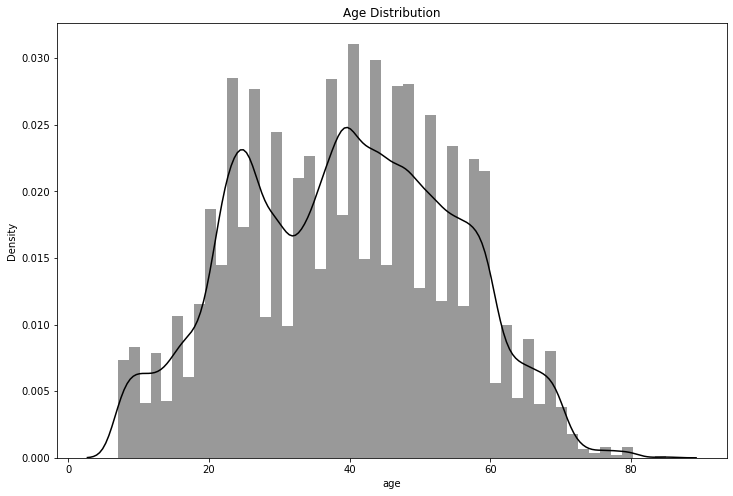

In [111]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_exploratory['age'], kde = True, color = 'black', norm_hist = True)
ax.set_title("Age Distribution")
plt.show()

#### Q.2: What is the proportion of male and female for Loyal Customer?

In [57]:
# Total of each gender
n_male = df_exploratory[df_exploratory['gender'] == 'Male'].count()[0]
n_female = df_exploratory[df_exploratory['gender'] == 'Female'].count()[0]

# Total of each gender for Loyal Customer
n_male_loyal = df_exploratory[(df_exploratory['gender'] == 'Male') & (df_exploratory['customer_type'] == 'Loyal Customer')].count()[0]
n_female_loyal = df_exploratory[(df_exploratory['gender'] == 'Female') & (df_exploratory['customer_type'] == 'Loyal Customer')].count()[0]

In [73]:
# Proportion of female that are loyal customers
proportion_fem = n_female_loyal / n_female * 100

# # Proportion of male that are loyal customers
proportion_male = n_male_loyal / n_male * 100

print(f'Loyal customers proportion: \n MALE: {proportion_male:.2f}% \n FEMALE: {proportion_fem:.2f}%')

Loyal customers proportion: 
 MALE: 82.91% 
 FEMALE: 80.51%


#### A.2: Loyal customers proportion: 
        MALE: 82.91%
        FEMALE: 80.51%

#### Q.3: From the proportion of Loyal Customers what is the proportion of male and female that flew in Business class?

In [74]:
# Proportion of male that flew in the business class
n_male_loyal_business = df_exploratory[(df_exploratory['gender'] == 'Male')
                            & (df_exploratory['customer_type'] == 'Loyal Customer')
                            & (df_exploratory['class'] == 'Business')].count()[0]

# Proportion of female that flew in the business class
n_female_loyal_business = df_exploratory[(df_exploratory['gender'] == 'Female')
                            & (df_exploratory['customer_type'] == 'Loyal Customer')
                            & (df_exploratory['class'] == 'Business')].count()[0]

In [80]:
# Proportion of female that flew in the business class
proportion_fem_class = n_female_loyal_business / n_female_loyal * 100

# Proportion of male that flew in the business class
proportion_mal_class = n_male_loyal_business / n_male_loyal * 100

print(f'Loyal customers that flew in the business class proportion: \n MALE: {proportion_mal_class:.2f}% \n FEMALE: {proportion_fem_class:.2f}%')

Loyal customers that flew in the business class proportion: 
 MALE: 49.84% 
 FEMALE: 49.94%


#### A.3: Loyal customers that flew in the business class proportion: 
        MALE: 49.84% 
        FEMALE: 49.94%

#### Q.4: What is the proportion of customers that evaluated the company with an overall under 30 points?

In [118]:

points_customer_satis = df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']][(df_exploratory.iloc[ : , 6 : -3].sum(axis = 1) <= 30) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]             
points_customer_neut = df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']][(df_exploratory.iloc[ : , 6 : -3].sum(axis = 1) <= 30) & (df_exploratory['satisfaction'] == 'neutral or dissatisfied')].count()[0]

print(f'Only {points_customer_satis / points_customer_neut *100:.2f}% of the passengers who rated the company below 30 points classified with "satisfied"')

Only 15.05% of the passengers who rated the company below 30 points classified with "satisfied"


#### A.4: Only 15.05% of passengers who rated the company below 30 points classified it as "satisfied"


In [120]:
df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']] \
              [(df_exploratory.iloc[ : , 6 : -3]
              .sum(axis = 1) <= 15) & (df_exploratory['satisfaction'])]

,gender,customer_type,age,type_of_travel,class,satisfaction
20959,Male,Loyal Customer,32,Business travel,Eco,satisfied
89930,Female,Loyal Customer,22,Business travel,Business,satisfied


#### Only two customers (loyal customers) that the overall points was less than 15 and yet classified with "satisfied"

In [121]:
df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']] \
              [(df_exploratory.iloc[ : , 6 : -3]
              .sum(axis = 1) < 30) & (df_exploratory['satisfaction'] == 'neutral or dissatisfied')].count()

gender            5065
customer_type     5065
age               5065
type_of_travel    5065
class             5065
satisfaction      5065
dtype: int64

In [137]:
null_satis = df_exploratory[(df_exploratory['arrival_delay_in_minutes'].isnull()) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]
null_total = df_exploratory[df_exploratory['arrival_delay_in_minutes'].isnull()].count()[0]

print(f'From null values the proportion of customers that classified with "satisfied" is: \n {null_satis / null_total * 100:.2f}%')

From null values the proportion of customers that classified with "satisfied" is: 
 42.24%


#### From null values the proportion of customers that classified with "satisfied" is: 
        42.24%

In [ ]:
# Descriptive analysis
df_exploratory.groupby(['age', 'customer_type', 'class'])['satisfaction'].value_counts()

Disloyal customers with age 31, 34, 53, 73, 74, 75 and 78 has no "satisfied" classifications

In [ ]:
df_exploratory['age'].value_counts(sort = True, ascending = False)

In [ ]:
plt.figure(figsize=(15, 10))
df_exploratory['age'].value_counts(normalize = True).plot(kind = 'bar')

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data = df_exploratory,
                x = df_exploratory.age,
                y = df_exploratory.age.value_counts(),
                size = df_exploratory.age.value_counts(),
                alpha = 0.5,
                sizes=(20, 800),
                hue = 'satisfaction',
                )
plt.ylabel('Persons')
plt.show()

In [ ]:
df_exploratory[(df_exploratory['age'] <= 18) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]

In [ ]:
df_exploratory[(df_exploratory['age'] <= 18) & (df_exploratory['satisfaction'] != 'satisfied')].count()[0]

In [ ]:
for atr in df_exploratory.columns:
    if df_exploratory[atr].dtype == "object":
        plt.figure(figsize=(10, 5))
        df_exploratory[atr].hist(bins = 5, grid = False, )
        plt.xlabel(atr)
        plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df_exploratory, x = 'class', y = 'age', hue = 'satisfaction')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df_exploratory,
                x = 'departure_delay_in_minutes',
                y = 'arrival_delay_in_minutes',
                hue = 'satisfaction',
                style = 'satisfaction')

This research has a metric of 0 to 5 for each one of the 15 attributes. Wich means the maximum result for each passenger is 75 points

In [ ]:
df_exploratory['max_points'] = df_exploratory.iloc[ : , 6 : -4].sum(axis = 1)
print('Max = ', df_exploratory['max_points'].max(), '\nMin = ', df_exploratory['max_points'].min())

In [ ]:
df_exploratory[df_exploratory['max_points'] >= 70]

In [ ]:
df_exploratory[df_exploratory['max_points'] <= 15]

In [ ]:
df_exploratory.groupby(['gender', 'customer_type', 'class'])['satisfaction'].value_counts()

In [ ]:
fig, ax = plt.subplots()

X = df_exploratory[df_exploratory['customer_type'] == 'Loyal Customer'].count()
y = df_exploratory[(df_exploratory['customer_type'] == 'Loyal Customer') &
    (df_exploratory['satisfaction'] == 'satisfied')].count()

customer = ax.bar('customer_type', X, label='Loyal Customer')
satisfaction = ax.bar('satisfaction', y, label='satisfied')

ax.bar_label(customer, label_type='edge')
ax.bar_label(satisfaction, label_type='edge')

plt.ylim(0, 150000)
plt.legend()

plt.show()


In [ ]:
df_exploratory.describe()

In [ ]:
df_concat.plot(kind = 'scatter', x = 'Age', y = 'Food and drink', s = 'Age')

In [ ]:
df_concat.hist(bins=50, figsize=(20, 15));

In [ ]:
sns.boxplot(data = df_concat, x = 'Age', y = 'Customer Type')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_concat['Online boarding'], df_concat['Food and drink'], color='red')
ax.scatter(df_concat['Food and drink'], df_concat['Online boarding'], color='blue')
plt.show()

In [ ]:
sns.boxplot(data = df_concat['Flight Distance'])

In [ ]:
df_concat['Age'].hist()